In [1]:
import math
import numpy as np
import time
from urllib import request
import pickle
import matplotlib.pyplot as plt

In [2]:
# Util functions:
def load():
    with open(file_name,'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]


def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))


def softmax_prime(z):
    return softmax(z) * (1 - softmax(z))

def relu(z):
    return np.maximum(z, 0)


# return 1 or 0
def relu_prime(z):
    return float(z > 0)


In [3]:
# # Load the training and testing dataset
import tensorflow as tf
file_name = 'data/mnist.pkl'

training_images, training_labels, testing_images, testing_labels = load()

# Normalize the data
training_images.astype('float32')
testing_images.astype('float32')
training_images = training_images/255
testing_images = testing_images/255

print('training_image shape:', training_images.shape)
print('Number of images in training set:', training_images.shape[0])
print('Number of images in testing set:', testing_images.shape[0])


training_image shape: (60000, 784)
Number of images in training set: 60000
Number of images in testing set: 10000


In [4]:
# Initialize the weight
weights = [np.random.randn(*w) * 0.1 for w in [(784, 200), (200, 50), (50,10)]]

# Initialize epoch, batch_size, learning_rate
epoch, batch_size, learning_rate = 10, 20, 0.01

In [5]:
# def forward(X, weight):
#     a = np.array([X])
#     for w in weight:
#         np.append(a, relu(a[-1].dot(np.array(w))))
#     return a
# X = [training_images[0:20]]
# print(np.shape(X))

# print(forward(X, weights))




# print("output_layer", output)


# def forward(X, weight):
#     first = relu(X.dot(weights[0]))
#     second = relu(first.dot(weights[1]))
#     output = softmax(second.dot(weights[2]))
#     return (first_h ,second_h, output)


In [20]:
import numpy as np
import mnist

def feed_forward(X, weights, bias):
    first = relu((np.dot(X, weights[0])))
    print(first.shape)
    
    second = relu((np.dot(first, weights[1])))
    print(second.shape)

    output = softmax((np.dot(second, weights[2])))
    print(output.shape)
    print("finish")
    return [first ,second, output]

def cross_entropy(pred, real):
#     print(real[0])
#     n_samples = real.shape[0]
    res = pred - real
#     print("p-r", pred, real)
#     return pred
    return res/20


def grads(X, Y, weights, bias):
    grads = np.empty_like(weights)
    a = feed_forward(X, weights, bias)
    
    
    
#     Feed forward equations:
#     z1 = x.w1+b1
#     a1 = relu(z1)

#     z2 = a1.w2+b2
#     a2 = relu(z2)

#     z3 = a2.w3+b3
#     a3 = softmax(z3)

#     Back propagation equations:

#     There is no z3_delta and softmax_derv(a3), as explained before.
#     a3_delta = a3-y    

#     z2_delta = a3_delta.w3.T
#     a2_delta = z2_delta.sigmoid_derv(a2)

#     z1_delta = a2_delta.w2.T
#     a1_delta = z1_delta.sigmoid_derv(a1)
    
    a3_delta = cross_entropy(a, Y)
    
    z2_delta = np.dot(a3_delta, weights[-1].T)
    
    a2_delta = z2_delta * relu_prime(weights[-2]) # w2
    
    z1_delta = np.dot(a2_delta, weights[-2].T)
    
    a1_delta = z1_delta * relu_prime(weights[-3]) # w1
    
    delta = softmax_prime(np.ones(a[-1].shape))
    
    
    weights[2] -= learning_rate * np.dot(weights[1].T, a3_delta)
#     bias[2] -= learning_rate * np.sum(a3_delta, axis=0, keepdims=True)
    weights[1] -= learning_rate * np.dot(weights[0].T, a2_delta)
#     bias[1] -= learning_rate * np.sum(a2_delta, axis=0)
    weights[0] -= learning_rate * np.dot(X, a1_delta)
#     bias[0] -= learning_rate * np.sum(a1_delta, axis=0)
    


# trX, trY, teX, teY = load()

training_images, training_labels, testing_images, testing_labels


weights = [np.random.randn(*w) * 0.1 for w in [(784, 200), (200,50), (50, 10)]]

bias = [np.random.randn(*w) * 0.1 for w in [(20, 200), (20,50), (20, 10)]]

num_epochs, batch_size, learn_rate = 10, 20, 0.1


def vectorize(Y):
    length = len(Y)
    arr = np.zeros([20,10])
    for i in range(length):
        arr[i][Y[i]] = 1
    return arr

for i in range(num_epochs):
    for j in range(0, len(training_images), batch_size):
        X, Y = training_images[j:j+batch_size], training_labels[j:j+batch_size]
        Y = vectorize(Y)
        grads(X, Y, weights, bias)
        
    prediction = np.argmax(feed_forward(testing_images, weights, bias)[-1], axis=1)
    
    
    print(i, np.mean(prediction == np.argmax(testing_labels, axis=1)))

(20, 200)
(20, 50)
(20, 10)
finish


ValueError: could not broadcast input array from shape (20,200) into shape (20)

In [ ]:
np.shape(weights[0])

In [ ]:
np.shape(weights[1])

In [ ]:
np.shape(weights[2])

  3%|▎         | 51/1875 [00:00<00:03, 503.92it/s]

Epoch 0
Train accuracy: 0.9207666666666666
Val accuracy: 0.9167


  2%|▏         | 42/1875 [00:00<00:04, 414.67it/s]

Epoch 1
Train accuracy: 0.9361166666666667
Val accuracy: 0.9321


  2%|▏         | 36/1875 [00:00<00:05, 351.10it/s]

Epoch 2
Train accuracy: 0.9485166666666667
Val accuracy: 0.944


  3%|▎         | 51/1875 [00:00<00:03, 508.08it/s]

Epoch 3
Train accuracy: 0.95125
Val accuracy: 0.9457


  2%|▏         | 41/1875 [00:00<00:04, 404.40it/s]

Epoch 4
Train accuracy: 0.96205
Val accuracy: 0.9513


  2%|▏         | 37/1875 [00:00<00:05, 362.67it/s]

Epoch 5
Train accuracy: 0.9606833333333333
Val accuracy: 0.9511


  3%|▎         | 49/1875 [00:00<00:03, 485.59it/s]

Epoch 6
Train accuracy: 0.9647666666666667
Val accuracy: 0.9521


  3%|▎         | 51/1875 [00:00<00:03, 505.16it/s]

Epoch 7
Train accuracy: 0.9660833333333333
Val accuracy: 0.9508


  3%|▎         | 64/1875 [00:00<00:02, 636.38it/s]

Epoch 8
Train accuracy: 0.9699166666666666
Val accuracy: 0.9551


100%|██████████| 1875/1875 [00:02<00:00, 716.67it/s]


Epoch 9
Train accuracy: 0.9718833333333333
Val accuracy: 0.9564


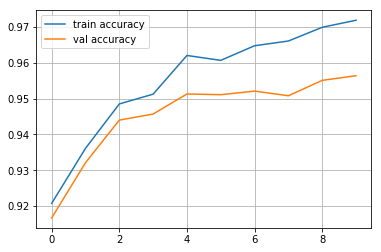

In [14]:
from __future__ import print_function
import numpy as np
np.random.seed(42)

class Layer:
    def __init__(self):
        """Here you can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        self.weights = np.zeros(shape=(input.shape[1], 10))
        bias = np.zeros(shape=(10,))
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, 10]
        """
        output = np.matmul(input, self.weights) + bias
        return output

class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.15):
        self.learning_rate = learning_rate
        
        # initialize weights with small random numbers. We use normal initialization
        self.weights = np.random.randn(input_units, output_units)*0.1
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        return np.matmul(input, self.weights) + self.biases
      
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output,np.transpose(self.weights))

        # compute gradient w.r.t. weights and biases
        grad_weights = np.transpose(np.dot(np.transpose(grad_output),input))
        grad_biases = np.sum(grad_output, axis = 0)
        
        # Here we perform a stochastic gradient descent step. 
        # Later on, you can try replacing that with something better.
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        return np.maximum(0,input)

    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad 

def softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy from logits[batch,n_classes] and ids of correct answers"""
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    
    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- ones_for_answers + softmax) / logits.shape[0]
  
# Import Dataset
import keras
def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_test, y_test
  

import matplotlib.pyplot as plt
X_train, y_train, X_test, y_test = load_dataset(flatten=True)

    
network = []
network.append(Dense(784,200))
network.append(ReLU())
network.append(Dense(200,50))
network.append(ReLU())
network.append(Dense(50,10))

def forward(network, X):
    """
    Compute activations of all network layers by applying them sequentially.
    Return a list of activations for each layer. 
    Make sure last activation corresponds to network logits.
    """
    activations = []
    input = X
    for i in range(len(network)):
        activations.append(network[i].forward(X))
        X = network[i].forward(X)
        
    assert len(activations) == len(network)
    return activations

def predict(network,X):
    """
    Compute network predictions.
    """
    logits = forward(network,X)[-1]
    return logits.argmax(axis=-1)

def train(network,X,y):
    """
    Train your network on a given batch of X and y.
    You first need to run forward to get all layer activations.
    Then you can run layer.backward going from last to first layer.
    After you called backward for all layers, all Dense layers have already made one gradient step.
    """
    
    # Get the layer activations
    layer_activations = forward(network,X)
    layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
    logits = layer_activations[-1]
    
    # Compute the loss and the initial gradient
    loss = softmax_crossentropy_with_logits(logits,y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
    
    for i in range(1, len(network)):
        loss_grad = network[len(network) - i].backward(layer_activations[len(network) - i - 1], loss_grad)
    
    return np.mean(loss)
  
from tqdm import trange
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]
        
train_log = []
val_log = []
for epoch in range(10):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network,x_batch,y_batch)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_test)==y_test))
    
#     clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    
plt.plot(train_log,label='train accuracy')
plt.plot(val_log,label='val accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()